In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import blimpy as bl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


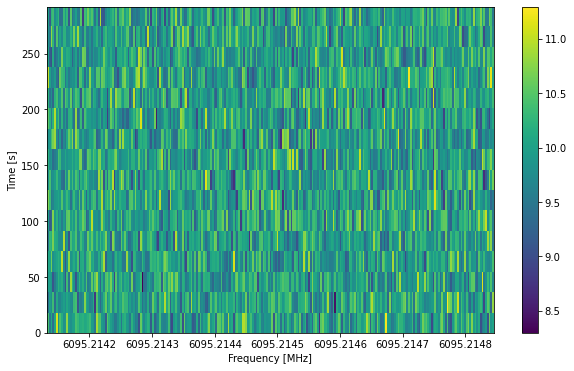

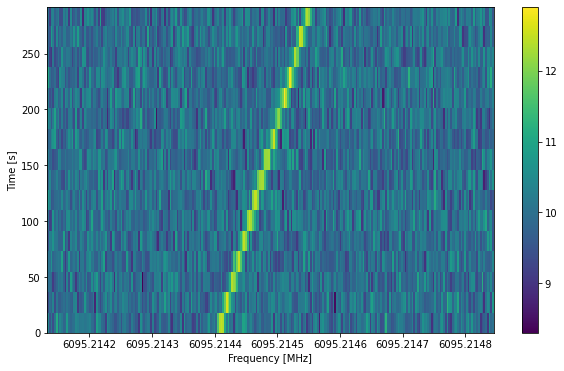

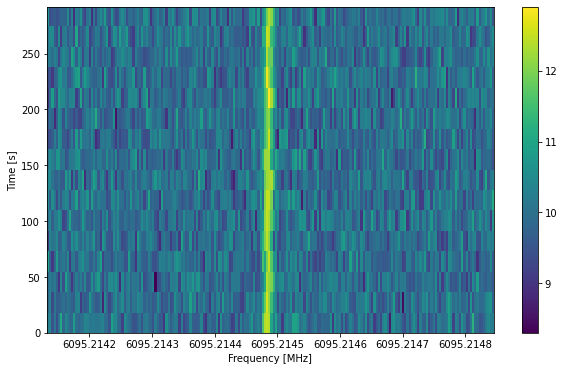

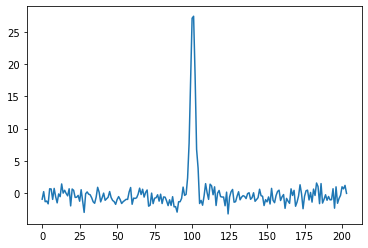

In [53]:
from astropy import units as u
import setigen as stg

frame = stg.Frame(fchans=256,
                  tchans=16,
                  df=2.7939677238464355*u.Hz,
                  dt=18.253611008*u.s,
                  fch1=6095.214842353016*u.MHz)
frame.add_noise(x_mean=10, noise_type='chi2')

fig=plt.figure(figsize=(10,6))
frame.bl_plot()
plt.title('')
plt.savefig('setigen-s-noise.pdf', bbox_inches='tight')
plt.show()
frame.add_signal(
    stg.constant_path(
        f_start=frame.get_frequency(index=100),
        drift_rate=0.5*u.Hz/u.s
    ),
    stg.constant_t_profile(
        level=frame.get_intensity(snr=30)
    ),
    stg.gaussian_f_profile(width=10*u.Hz),
    stg.constant_bp_profile(level=1)
)

fig=plt.figure(figsize=(10,6))
frame.bl_plot()
plt.title('')
plt.savefig('setigen-s-noise+signal.pdf', bbox_inches='tight')
plt.show()

frame_dd = stg.dedrift(frame, 0.5)
fig=plt.figure(figsize=(10,6))
frame_dd.bl_plot()
plt.title('')
plt.savefig('setigen-s-noise+signal+dedrift.pdf', bbox_inches='tight')
plt.show()

spec = frame_dd.integrate()
spec -= np.mean(spec)
spec /= (frame_dd.noise_std / frame_dd.tchans**0.5)
plt.plot(spec)
plt.show()

(16, 1048576)

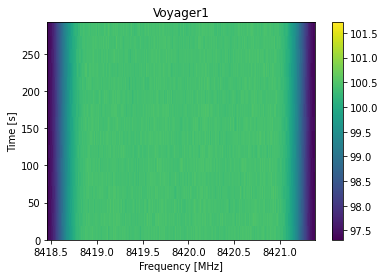

In [7]:
fr = stg.Frame('/datax/scratch/bbrzycki/Voyager1.single_coarse.fine_res.h5')
fr.bl_plot()
fr.shape

(16, 71583)


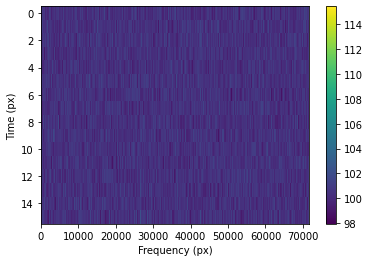

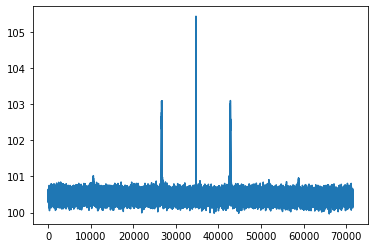

In [31]:
fr_slice = fr.get_slice(fr.get_index(8419.2*u.MHz), fr.get_index(8419.4e6))
print(fr_slice.shape)
fr_slice.plot(use_db=True)
plt.show()
plt.plot(stg.db(fr_slice.integrate()))
plt.show()

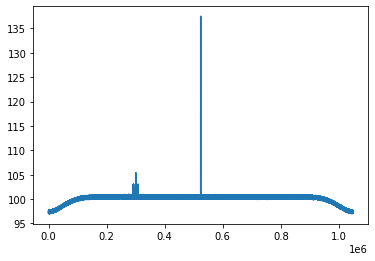

In [21]:
import matplotlib.pyplot as plt

plt.plot(stg.db(fr.integrate()))
plt.show()

(16, 31583)


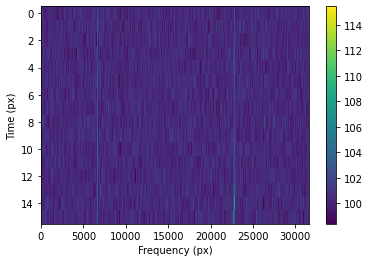

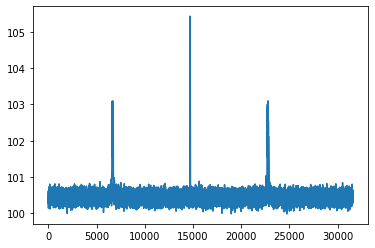

In [31]:
fr_slice = fr.get_slice(fr.get_index(8419.2*u.MHz)+20000, fr.get_index(8419.4e6)-20000)
print(fr_slice.shape)
fr_slice.plot(use_db=True)
plt.show()
plt.plot(stg.db(fr_slice.integrate()))
plt.show()

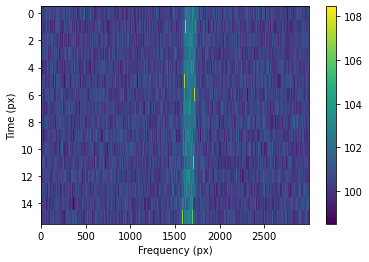

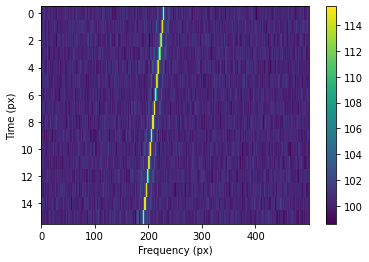

In [36]:
fr_slice.get_slice(5000, 8000).plot(use_db=True)
plt.show()
fr_slice.get_slice(14500, 15000).plot(use_db=True)
plt.show()

In [39]:
fr.df

2.7939677238464355

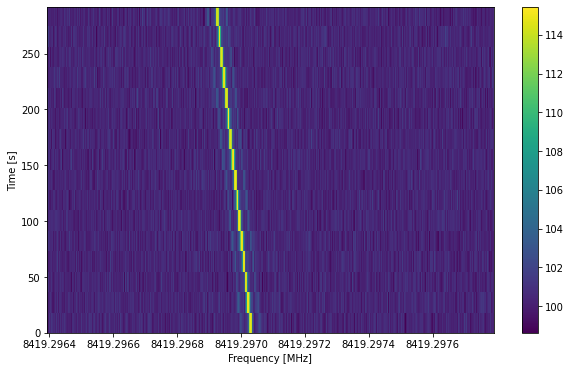

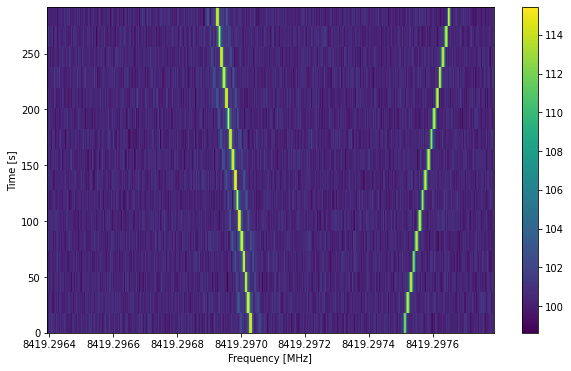

In [56]:
df = 2.7939677238464355
fr = stg.Frame(bl.Waterfall('/datax/scratch/bbrzycki/Voyager1.single_coarse.fine_res.h5',
               f_start=8419.2+34500*df/1e6,
               f_stop=8419.2+35000*df/1e6))
fig=plt.figure(figsize=(10,6))
fr.bl_plot()
plt.title('')
plt.savefig('setigen-s-voyager.pdf', bbox_inches='tight')
plt.show()

fr.add_signal(
    stg.constant_path(
        f_start=fr.get_frequency(index=400),
        drift_rate=0.5*u.Hz/u.s
    ),
    stg.constant_t_profile(
        level=fr.get_intensity(snr=1000)
    ),
    stg.gaussian_f_profile(width=2*fr.df),
    stg.constant_bp_profile(level=1)
)
fig=plt.figure(figsize=(10,6))
fr.bl_plot()
plt.title('')
plt.savefig('setigen-s-voyager+signal.pdf', bbox_inches='tight')
plt.show()

In [43]:
fr.shape

(16, 500)

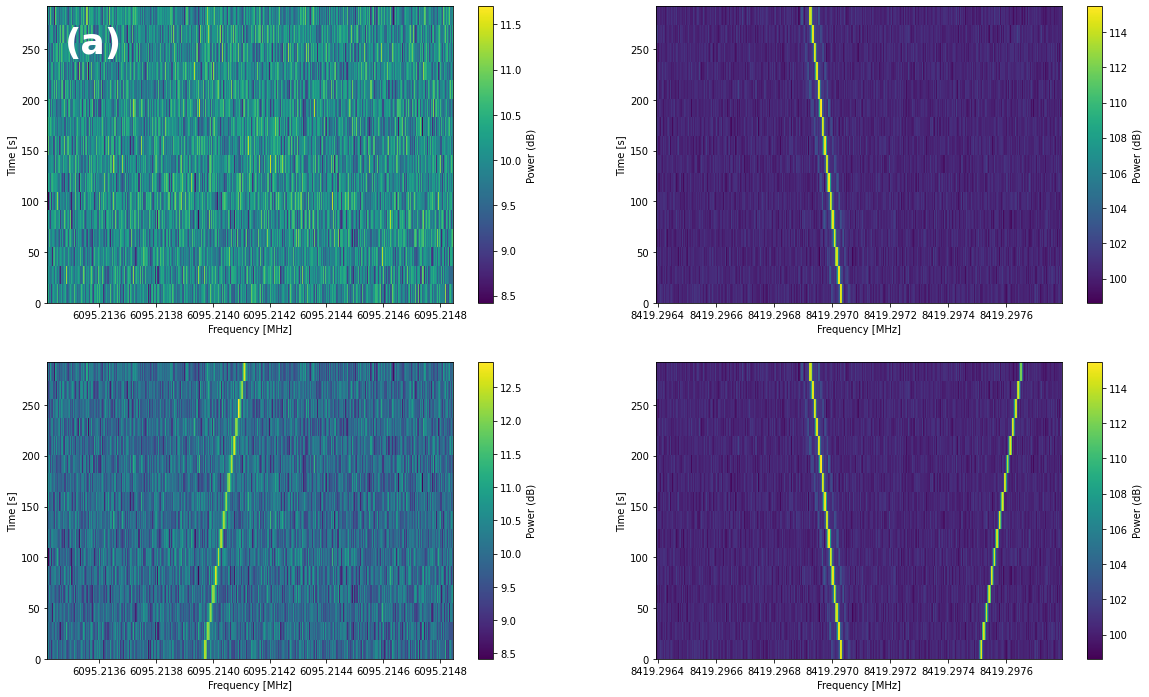

In [43]:
from astropy import units as u
import setigen as stg

fig, axs = plt.subplots(2, 2, figsize=(20, 12))
# plt.tight_layout()

# Synthetic plots

frame = stg.Frame(fchans=512,
                  tchans=16,
                  df=2.7939677238464355*u.Hz,
                  dt=18.253611008*u.s,
                  fch1=6095.214842353016*u.MHz)
frame.add_noise(x_mean=10, noise_type='chi2')


plt.sca(axs[0, 0])
frame.bl_plot()
plt.title('')
cbar = plt.gca().images[-1].colorbar
cbar.set_label('Power (dB)')

import matplotlib.transforms as mtransforms
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
axs[0,0].text(0.02, 0.95, 
              '(a)',
              transform=axs[0,0].transAxes + trans,
              verticalalignment='top',
              fontsize=36,
              fontweight='bold',
              color='white')


frame.add_signal(
    stg.constant_path(
        f_start=frame.get_frequency(index=200),
        drift_rate=0.5*u.Hz/u.s
    ),
    stg.constant_t_profile(
        level=frame.get_intensity(snr=30)
    ),
    stg.gaussian_f_profile(width=10*u.Hz),
    stg.constant_bp_profile(level=1)
)

plt.sca(axs[1, 0])
frame.bl_plot()
plt.title('')
cbar = plt.gca().images[-1].colorbar
cbar.set_label('Power (dB)')


# Voyager plots

df = 2.7939677238464355
fr = stg.Frame(bl.Waterfall('/datax/scratch/bbrzycki/Voyager1.single_coarse.fine_res.h5',
               f_start=8419.2+34500*df/1e6,
               f_stop=8419.2+35000*df/1e6))

plt.sca(axs[0, 1])
fr.bl_plot()
plt.title('')
cbar = plt.gca().images[-1].colorbar
cbar.set_label('Power (dB)')

fr.add_signal(
    stg.constant_path(
        f_start=fr.get_frequency(index=400),
        drift_rate=0.5*u.Hz/u.s
    ),
    stg.constant_t_profile(
        level=fr.get_intensity(snr=1000)
    ),
    stg.gaussian_f_profile(width=2*fr.df),
    stg.constant_bp_profile(level=1)
)

plt.sca(axs[1, 1])
fr.bl_plot()
plt.title('')
cbar = plt.gca().images[-1].colorbar
cbar.set_label('Power (dB)')




plt.show()


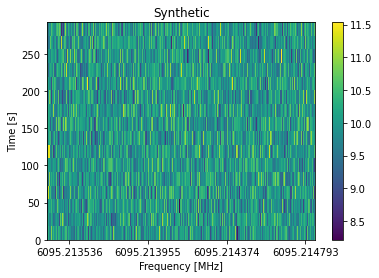

In [47]:
frame = stg.Frame(fchans=512,
                  tchans=16,
                  df=2.7939677238464355*u.Hz,
                  dt=18.253611008*u.s,
                  fch1=6095.214842353016*u.MHz)
frame.add_noise(x_mean=10, noise_type='chi2')

frame.bl_plot()
import matplotlib.ticker as ticker
tick_spacing=2.7939677238464355*150/1e6
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.show()

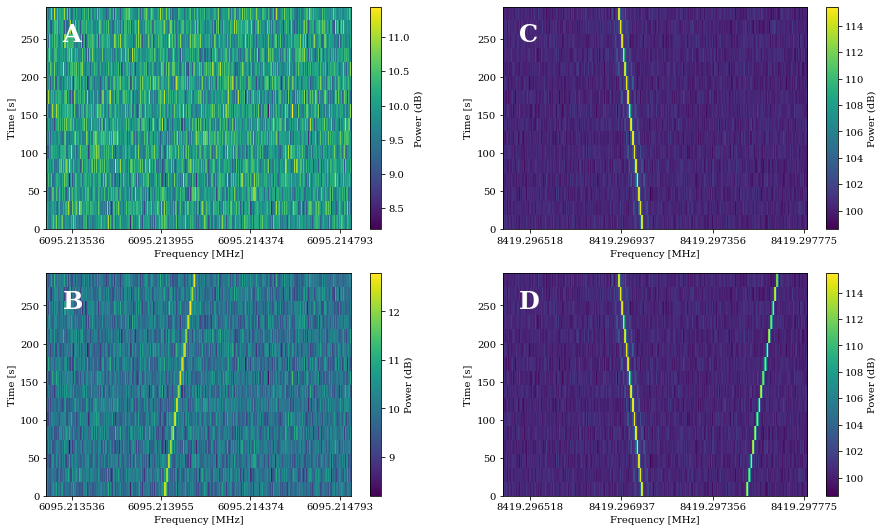

In [55]:
from astropy import units as u
import setigen as stg


plt.rc('font', family='serif')

fig, axs = plt.subplots(2, 2, figsize=(15, 9))
# plt.tight_layout()

import matplotlib.transforms as mtransforms
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
import matplotlib.ticker as ticker
tick_spacing=2.7939677238464355*150/1e6


# Synthetic plots

frame = stg.Frame(fchans=512,
                  tchans=16,
                  df=2.7939677238464355*u.Hz,
                  dt=18.253611008*u.s,
                  fch1=6095.214842353016*u.MHz)
frame.add_noise(x_mean=10, noise_type='chi2')


plt.sca(axs[0, 0])
frame.bl_plot()
plt.title('')
cbar = plt.gca().images[-1].colorbar
cbar.set_label('Power (dB)')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))


frame.add_signal(
    stg.constant_path(
        f_start=frame.get_frequency(index=200),
        drift_rate=0.5*u.Hz/u.s
    ),
    stg.constant_t_profile(
        level=frame.get_intensity(snr=30)
    ),
    stg.gaussian_f_profile(width=10*u.Hz),
    stg.constant_bp_profile(level=1)
)

plt.sca(axs[1, 0])
frame.bl_plot()
plt.title('')
cbar = plt.gca().images[-1].colorbar
cbar.set_label('Power (dB)')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

# Voyager plots

df = 2.7939677238464355
fr = stg.Frame(bl.Waterfall('/datax/scratch/bbrzycki/Voyager1.single_coarse.fine_res.h5',
               f_start=8419.2+34500*df/1e6,
               f_stop=8419.2+35000*df/1e6))

plt.sca(axs[0, 1])
fr.bl_plot()
plt.title('')
cbar = plt.gca().images[-1].colorbar
cbar.set_label('Power (dB)')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

fr.add_signal(
    stg.constant_path(
        f_start=fr.get_frequency(index=400),
        drift_rate=0.5*u.Hz/u.s
    ),
    stg.constant_t_profile(
        level=fr.get_intensity(snr=1000)
    ),
    stg.gaussian_f_profile(width=2*fr.df),
    stg.constant_bp_profile(level=1)
)

plt.sca(axs[1, 1])
fr.bl_plot()
plt.title('')
cbar = plt.gca().images[-1].colorbar
cbar.set_label('Power (dB)')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))




axs[0,0].text(0.02, 0.95, 
              'A',
              transform=axs[0,0].transAxes + trans,
              verticalalignment='top',
              fontsize=24,
              fontweight='bold',
              color='white')

axs[1,0].text(0.02, 0.95, 
              'B',
              transform=axs[1,0].transAxes + trans,
              verticalalignment='top',
              fontsize=24,
              fontweight='bold',
              color='white')

axs[0,1].text(0.02, 0.95, 
              'C',
              transform=axs[0,1].transAxes + trans,
              verticalalignment='top',
              fontsize=24,
              fontweight='bold',
              color='white')

axs[1,1].text(0.02, 0.95, 
              'D',
              transform=axs[1,1].transAxes + trans,
              verticalalignment='top',
              fontsize=24,
              fontweight='bold',
              color='white')


plt.savefig('spectrogram_multiplot.pdf', bbox_inches='tight')
plt.show()




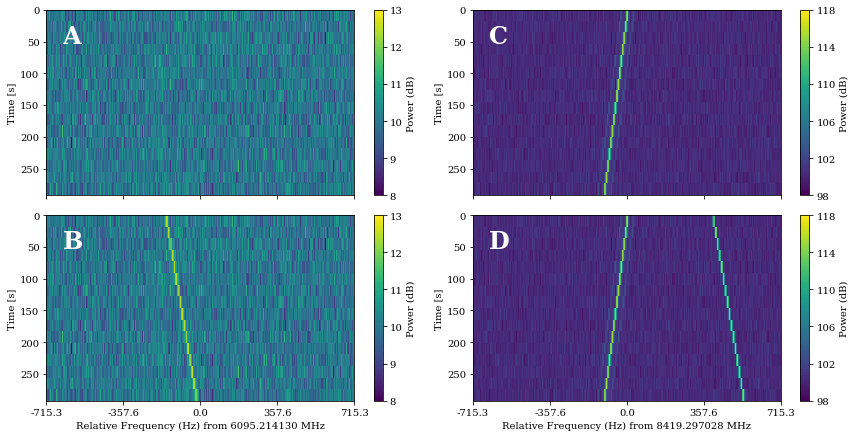

In [22]:
from astropy import units as u
import setigen as stg


plt.rc('font', family='serif')

fig, axs = plt.subplots(2, 2, figsize=(12, 6), sharex='col')
plt.tight_layout()

import matplotlib.transforms as mtransforms
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
import matplotlib.ticker as ticker
tick_spacing=2.7939677238464355*150/1e6


# Synthetic plots

frame = stg.Frame(fchans=512,
                  tchans=16,
                  df=2.7939677238464355*u.Hz,
                  dt=18.253611008*u.s,
                  fch1=6095.214842353016*u.MHz)
frame.add_noise(x_mean=10, noise_type='chi2')


plt.sca(axs[0, 0])
plt.imshow(frame.get_data(use_db=True), 
           extent=[frame.fs[0]-frame.fs[256], frame.fs[-1]+frame.df-frame.fs[256], frame.ts[-1]+frame.dt, frame.ts[0]],
           aspect='auto', 
           interpolation='none')
plt.ylabel('Time [s]')

cbar = plt.colorbar()
cbar.set_label('Power (dB)')
plt.clim(8, 13)
cbar.ax.locator_params(nbins=5)

# rel_freq = frame.fmin-frame.fs[256]+np.arange(5)*128*frame.df
# # plt.xticks(ticks=np.arange(5)*128,
# #            labels=[f'{freq:0.1f}' for freq in rel_freq])
# plt.xticks(ticks=rel_freq,
#            labels=[f'{freq:0.1f}' for freq in rel_freq])
# plt.xlabel(f'Relative Frequency (Hz) from {frame.fs[256]/1e6:.6f} MHz')


frame.add_signal(
    stg.constant_path(
        f_start=frame.get_frequency(index=200),
        drift_rate=0.5*u.Hz/u.s
    ),
    stg.constant_t_profile(
        level=frame.get_intensity(snr=30)
    ),
    stg.gaussian_f_profile(width=10*u.Hz),
    stg.constant_bp_profile(level=1)
)

plt.sca(axs[1, 0])
plt.imshow(frame.get_data(use_db=True), 
           extent=[frame.fs[0]-frame.fs[256], frame.fs[-1]+frame.df-frame.fs[256], frame.ts[-1]+frame.dt, frame.ts[0]],
           aspect='auto', 
           interpolation='none')
plt.ylabel('Time [s]')

cbar = plt.colorbar()
cbar.set_label('Power (dB)')
plt.clim(8, 13)
cbar.ax.locator_params(nbins=5)

rel_freq = frame.fmin-frame.fs[256]+np.arange(5)*128*frame.df
# plt.xticks(ticks=np.arange(5)*128,
#            labels=[f'{freq:0.1f}' for freq in rel_freq])
plt.xticks(ticks=rel_freq,
           labels=[f'{freq:0.1f}' for freq in rel_freq])
plt.xlabel(f'Relative Frequency (Hz) from {frame.fs[256]/1e6:.6f} MHz')



# Voyager plots


# Adjusted freqency so that Voyager starts exactly in the middle (index 256)
df = 2.7939677238464355
fr = stg.Frame(bl.Waterfall('/datax/scratch/bbrzycki/Voyager1.single_coarse.fine_res.h5',
               f_start=8419.2+(34500-6-23)*df/1e6,
               f_stop=8419.2+(35012-6-23)*df/1e6))

plt.sca(axs[0, 1])
plt.imshow(fr.get_data(use_db=True), 
           extent=[fr.fs[0]-fr.fs[256], fr.fs[-1]+fr.df-fr.fs[256], fr.ts[-1]+fr.dt, fr.ts[0]],
           aspect='auto', 
           interpolation='none')
plt.ylabel('Time [s]')

cbar = plt.colorbar()
cbar.set_label('Power (dB)')
plt.clim(98, 118)
cbar.set_ticks(98+np.arange(6)*4)

# rel_freq = fr.fmin-fr.fs[256]+np.arange(5)*128*fr.df
# # plt.xticks(ticks=np.arange(5)*128,
# #            labels=[f'{freq:0.1f}' for freq in rel_freq])
# plt.xticks(ticks=rel_freq,
#            labels=[f'{freq:0.1f}' for freq in rel_freq])
# plt.xlabel(f'Relative Frequency (Hz) from {fr.fs[256]/1e6:.6f} MHz')

fr.add_signal(
    stg.constant_path(
        f_start=fr.get_frequency(index=400),
        drift_rate=0.5*u.Hz/u.s
    ),
    stg.constant_t_profile(
        level=fr.get_intensity(snr=1000)
    ),
    stg.gaussian_f_profile(width=2*fr.df),
    stg.constant_bp_profile(level=1)
)

plt.sca(axs[1, 1])
plt.imshow(fr.get_data(use_db=True), 
           extent=[fr.fs[0]-fr.fs[256], fr.fs[-1]+fr.df-fr.fs[256], fr.ts[-1]+fr.dt, fr.ts[0]],
           aspect='auto', 
           interpolation='none')
plt.ylabel('Time [s]')

cbar = plt.colorbar()
cbar.set_label('Power (dB)')
plt.clim(98, 118)
cbar.set_ticks(98+np.arange(6)*4)

rel_freq = fr.fmin-fr.fs[256]+np.arange(5)*128*fr.df
# plt.xticks(ticks=np.arange(5)*128,
#            labels=[f'{freq:0.1f}' for freq in rel_freq])
plt.xticks(ticks=rel_freq,
           labels=[f'{freq:0.1f}' for freq in rel_freq])
plt.xlabel(f'Relative Frequency (Hz) from {fr.fs[256]/1e6:.6f} MHz')



axs[0,0].text(0.02, 0.952, 
              'A',
              transform=axs[0,0].transAxes + trans,
              verticalalignment='top',
              fontsize=24,
              fontweight='bold',
              color='white')

axs[1,0].text(0.02, 0.952, 
              'B',
              transform=axs[1,0].transAxes + trans,
              verticalalignment='top',
              fontsize=24,
              fontweight='bold',
              color='white')

axs[0,1].text(0.02, 0.952, 
              'C',
              transform=axs[0,1].transAxes + trans,
              verticalalignment='top',
              fontsize=24,
              fontweight='bold',
              color='white')

axs[1,1].text(0.02, 0.952, 
              'D',
              transform=axs[1,1].transAxes + trans,
              verticalalignment='top',
              fontsize=24,
              fontweight='bold',
              color='white')


# plt.savefig('spectrogram_multiplot.pdf', bbox_inches='tight')
plt.show()




In [62]:
8419.2+34500*df/1e6

8419.296391886473

In [79]:
frame.shape

(16, 512)

In [80]:
fr.data[0].shape

(512,)

array([256, 400, 257, 255, 401, 399, 398, 402, 254, 258])

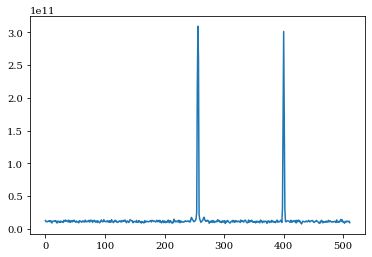

In [82]:
plt.plot(fr.data[0])
np.argsort(fr.data[0])[::-1][:10]

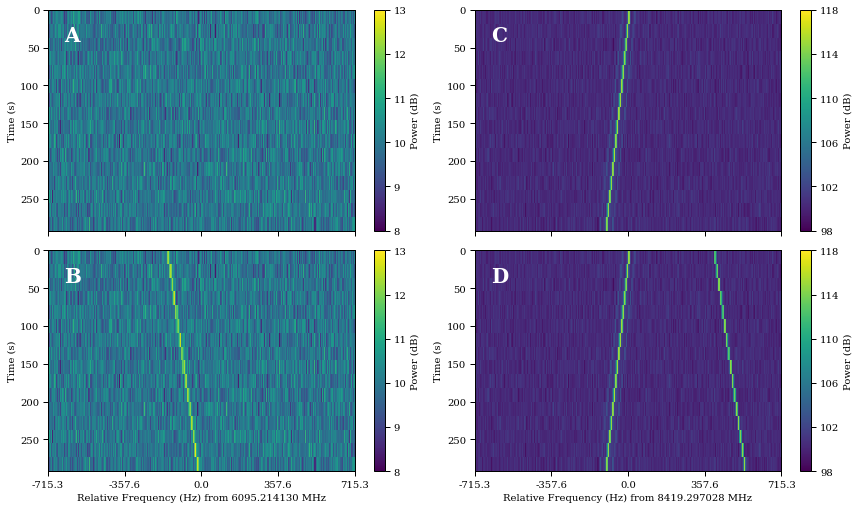

In [97]:
from astropy import units as u
import setigen as stg


plt.rc('font', family='serif')
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 1

fig, axs = plt.subplots(2, 2, figsize=(12, 7), sharex='col')
plt.tight_layout()

import matplotlib.transforms as mtransforms
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
import matplotlib.ticker as ticker
tick_spacing=2.7939677238464355*150/1e6


# Synthetic plots

frame = stg.Frame(fchans=512,
                  tchans=16,
                  df=2.7939677238464355*u.Hz,
                  dt=18.253611008*u.s,
                  fch1=6095.214842353016*u.MHz)
frame.add_noise(x_mean=10, noise_type='chi2')


plt.sca(axs[0, 0])
plt.imshow(frame.get_data(use_db=True), 
           extent=[frame.fs[0]-frame.fs[256], frame.fs[-1]+frame.df-frame.fs[256], frame.ts[-1]+frame.dt, frame.ts[0]],
           aspect='auto', 
           interpolation='none')
plt.ylabel('Time (s)')

cbar = plt.colorbar()
cbar.set_label('Power (dB)')
plt.clim(8, 13)
cbar.ax.locator_params(nbins=5)

# rel_freq = frame.fmin-frame.fs[256]+np.arange(5)*128*frame.df
# # plt.xticks(ticks=np.arange(5)*128,
# #            labels=[f'{freq:0.1f}' for freq in rel_freq])
# plt.xticks(ticks=rel_freq,
#            labels=[f'{freq:0.1f}' for freq in rel_freq])
# plt.xlabel(f'Relative Frequency (Hz) from {frame.fs[256]/1e6:.6f} MHz')


frame.add_signal(
    stg.constant_path(
        f_start=frame.get_frequency(index=200),
        drift_rate=0.5*u.Hz/u.s
    ),
    stg.constant_t_profile(
        level=frame.get_intensity(snr=30)
    ),
    stg.gaussian_f_profile(width=10*u.Hz),
    stg.constant_bp_profile(level=1)
)

plt.sca(axs[1, 0])
plt.imshow(frame.get_data(use_db=True), 
           extent=[frame.fs[0]-frame.fs[256], frame.fs[-1]+frame.df-frame.fs[256], frame.ts[-1]+frame.dt, frame.ts[0]],
           aspect='auto', 
           interpolation='none')
plt.ylabel('Time (s)')

cbar = plt.colorbar()
cbar.set_label('Power (dB)')
plt.clim(8, 13)
cbar.ax.locator_params(nbins=5)

rel_freq = frame.fmin-frame.fs[256]+np.arange(5)*128*frame.df
# plt.xticks(ticks=np.arange(5)*128,
#            labels=[f'{freq:0.1f}' for freq in rel_freq])
plt.xticks(ticks=rel_freq,
           labels=[f'{freq:0.1f}' for freq in rel_freq])
plt.xlabel(f'Relative Frequency (Hz) from {frame.fs[256]/1e6:.6f} MHz')



# Voyager plots


# Adjusted freqency so that Voyager starts exactly in the middle (index 256)
df = 2.7939677238464355
fr = stg.Frame(bl.Waterfall('/datax/scratch/bbrzycki/Voyager1.single_coarse.fine_res.h5',
               f_start=8419.2+(34500-6-23)*df/1e6,
               f_stop=8419.2+(35012-6-23)*df/1e6))

plt.sca(axs[0, 1])
plt.imshow(fr.get_data(use_db=True), 
           extent=[fr.fs[0]-fr.fs[256], fr.fs[-1]+fr.df-fr.fs[256], fr.ts[-1]+fr.dt, fr.ts[0]],
           aspect='auto', 
           interpolation='none')
plt.ylabel('Time (s)')

cbar = plt.colorbar()
cbar.set_label('Power (dB)')
plt.clim(98, 118)
cbar.set_ticks(98+np.arange(6)*4)

# rel_freq = fr.fmin-fr.fs[256]+np.arange(5)*128*fr.df
# # plt.xticks(ticks=np.arange(5)*128,
# #            labels=[f'{freq:0.1f}' for freq in rel_freq])
# plt.xticks(ticks=rel_freq,
#            labels=[f'{freq:0.1f}' for freq in rel_freq])
# plt.xlabel(f'Relative Frequency (Hz) from {fr.fs[256]/1e6:.6f} MHz')

fr.add_signal(
    stg.constant_path(
        f_start=fr.get_frequency(index=400),
        drift_rate=0.5*u.Hz/u.s
    ),
    stg.constant_t_profile(
        level=fr.get_intensity(snr=1000)
    ),
    stg.gaussian_f_profile(width=2*fr.df),
    stg.constant_bp_profile(level=1)
)

plt.sca(axs[1, 1])
plt.imshow(fr.get_data(use_db=True), 
           extent=[fr.fs[0]-fr.fs[256], fr.fs[-1]+fr.df-fr.fs[256], fr.ts[-1]+fr.dt, fr.ts[0]],
           aspect='auto', 
           interpolation='none')
plt.ylabel('Time (s)')

cbar = plt.colorbar()
cbar.set_label('Power (dB)')
plt.clim(98, 118)
cbar.set_ticks(98+np.arange(6)*4)

rel_freq = fr.fmin-fr.fs[256]+np.arange(5)*128*fr.df
# plt.xticks(ticks=np.arange(5)*128,
#            labels=[f'{freq:0.1f}' for freq in rel_freq])
plt.xticks(ticks=rel_freq,
           labels=[f'{freq:0.1f}' for freq in rel_freq])
plt.xlabel(f'Relative Frequency (Hz) from {fr.fs[256]/1e6:.6f} MHz')



axs[0,0].text(0.02, 0.952, 
              'A',
              transform=axs[0,0].transAxes + trans,
              verticalalignment='top',
              fontsize=20,
              fontweight='bold',
              color='white')

axs[1,0].text(0.02, 0.952, 
              'B',
              transform=axs[1,0].transAxes + trans,
              verticalalignment='top',
              fontsize=20,
              fontweight='bold',
              color='white')

axs[0,1].text(0.02, 0.952, 
              'C',
              transform=axs[0,1].transAxes + trans,
              verticalalignment='top',
              fontsize=20,
              fontweight='bold',
              color='white')

axs[1,1].text(0.02, 0.952, 
              'D',
              transform=axs[1,1].transAxes + trans,
              verticalalignment='top',
              fontsize=20,
              fontweight='bold',
              color='white')


plt.savefig('spectrogram_multiplot.pdf', bbox_inches='tight')
plt.show()




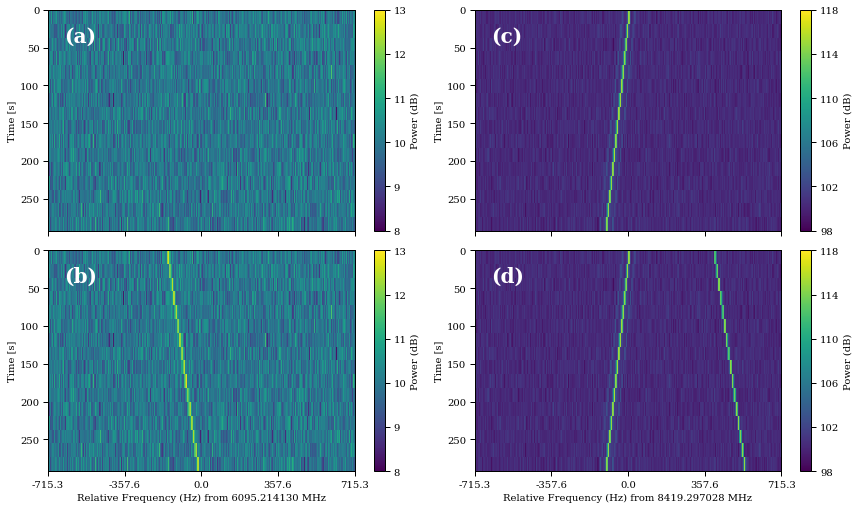

In [92]:
from astropy import units as u
import setigen as stg


plt.rc('font', family='serif')
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 1

fig, axs = plt.subplots(2, 2, figsize=(12, 7), sharex='col')
plt.tight_layout()

import matplotlib.transforms as mtransforms
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
import matplotlib.ticker as ticker
tick_spacing=2.7939677238464355*150/1e6


# Synthetic plots

frame = stg.Frame(fchans=512,
                  tchans=16,
                  df=2.7939677238464355*u.Hz,
                  dt=18.253611008*u.s,
                  fch1=6095.214842353016*u.MHz)
frame.add_noise(x_mean=10, noise_type='chi2')


plt.sca(axs[0, 0])
plt.imshow(frame.get_data(use_db=True), 
           extent=[frame.fs[0]-frame.fs[256], frame.fs[-1]+frame.df-frame.fs[256], frame.ts[-1]+frame.dt, frame.ts[0]],
           aspect='auto', 
           interpolation='none')
plt.ylabel('Time [s]')

cbar = plt.colorbar()
cbar.set_label('Power (dB)')
plt.clim(8, 13)
cbar.ax.locator_params(nbins=5)

# rel_freq = frame.fmin-frame.fs[256]+np.arange(5)*128*frame.df
# # plt.xticks(ticks=np.arange(5)*128,
# #            labels=[f'{freq:0.1f}' for freq in rel_freq])
# plt.xticks(ticks=rel_freq,
#            labels=[f'{freq:0.1f}' for freq in rel_freq])
# plt.xlabel(f'Relative Frequency (Hz) from {frame.fs[256]/1e6:.6f} MHz')


frame.add_signal(
    stg.constant_path(
        f_start=frame.get_frequency(index=200),
        drift_rate=0.5*u.Hz/u.s
    ),
    stg.constant_t_profile(
        level=frame.get_intensity(snr=30)
    ),
    stg.gaussian_f_profile(width=10*u.Hz),
    stg.constant_bp_profile(level=1)
)

plt.sca(axs[1, 0])
plt.imshow(frame.get_data(use_db=True), 
           extent=[frame.fs[0]-frame.fs[256], frame.fs[-1]+frame.df-frame.fs[256], frame.ts[-1]+frame.dt, frame.ts[0]],
           aspect='auto', 
           interpolation='none')
plt.ylabel('Time [s]')

cbar = plt.colorbar()
cbar.set_label('Power (dB)')
plt.clim(8, 13)
cbar.ax.locator_params(nbins=5)

rel_freq = frame.fmin-frame.fs[256]+np.arange(5)*128*frame.df
# plt.xticks(ticks=np.arange(5)*128,
#            labels=[f'{freq:0.1f}' for freq in rel_freq])
plt.xticks(ticks=rel_freq,
           labels=[f'{freq:0.1f}' for freq in rel_freq])
plt.xlabel(f'Relative Frequency (Hz) from {frame.fs[256]/1e6:.6f} MHz')



# Voyager plots


# Adjusted freqency so that Voyager starts exactly in the middle (index 256)
df = 2.7939677238464355
fr = stg.Frame(bl.Waterfall('/datax/scratch/bbrzycki/Voyager1.single_coarse.fine_res.h5',
               f_start=8419.2+(34500-6-23)*df/1e6,
               f_stop=8419.2+(35012-6-23)*df/1e6))

plt.sca(axs[0, 1])
plt.imshow(fr.get_data(use_db=True), 
           extent=[fr.fs[0]-fr.fs[256], fr.fs[-1]+fr.df-fr.fs[256], fr.ts[-1]+fr.dt, fr.ts[0]],
           aspect='auto', 
           interpolation='none')
plt.ylabel('Time [s]')

cbar = plt.colorbar()
cbar.set_label('Power (dB)')
plt.clim(98, 118)
cbar.set_ticks(98+np.arange(6)*4)

# rel_freq = fr.fmin-fr.fs[256]+np.arange(5)*128*fr.df
# # plt.xticks(ticks=np.arange(5)*128,
# #            labels=[f'{freq:0.1f}' for freq in rel_freq])
# plt.xticks(ticks=rel_freq,
#            labels=[f'{freq:0.1f}' for freq in rel_freq])
# plt.xlabel(f'Relative Frequency (Hz) from {fr.fs[256]/1e6:.6f} MHz')

fr.add_signal(
    stg.constant_path(
        f_start=fr.get_frequency(index=400),
        drift_rate=0.5*u.Hz/u.s
    ),
    stg.constant_t_profile(
        level=fr.get_intensity(snr=1000)
    ),
    stg.gaussian_f_profile(width=2*fr.df),
    stg.constant_bp_profile(level=1)
)

plt.sca(axs[1, 1])
plt.imshow(fr.get_data(use_db=True), 
           extent=[fr.fs[0]-fr.fs[256], fr.fs[-1]+fr.df-fr.fs[256], fr.ts[-1]+fr.dt, fr.ts[0]],
           aspect='auto', 
           interpolation='none')
plt.ylabel('Time [s]')

cbar = plt.colorbar()
cbar.set_label('Power (dB)')
plt.clim(98, 118)
cbar.set_ticks(98+np.arange(6)*4)

rel_freq = fr.fmin-fr.fs[256]+np.arange(5)*128*fr.df
# plt.xticks(ticks=np.arange(5)*128,
#            labels=[f'{freq:0.1f}' for freq in rel_freq])
plt.xticks(ticks=rel_freq,
           labels=[f'{freq:0.1f}' for freq in rel_freq])
plt.xlabel(f'Relative Frequency (Hz) from {fr.fs[256]/1e6:.6f} MHz')



axs[0,0].text(0.02, 0.952, 
              '(a)',
              transform=axs[0,0].transAxes + trans,
              verticalalignment='top',
              fontsize=20,
              fontweight='bold',
              color='white')

axs[1,0].text(0.02, 0.952, 
              '(b)',
              transform=axs[1,0].transAxes + trans,
              verticalalignment='top',
              fontsize=20,
              fontweight='bold',
              color='white')

axs[0,1].text(0.02, 0.952, 
              '(c)',
              transform=axs[0,1].transAxes + trans,
              verticalalignment='top',
              fontsize=20,
              fontweight='bold',
              color='white')

axs[1,1].text(0.02, 0.952, 
              '(d)',
              transform=axs[1,1].transAxes + trans,
              verticalalignment='top',
              fontsize=20,
              fontweight='bold',
              color='white')


# plt.savefig('spectrogram_multiplot.pdf', bbox_inches='tight')
plt.show()




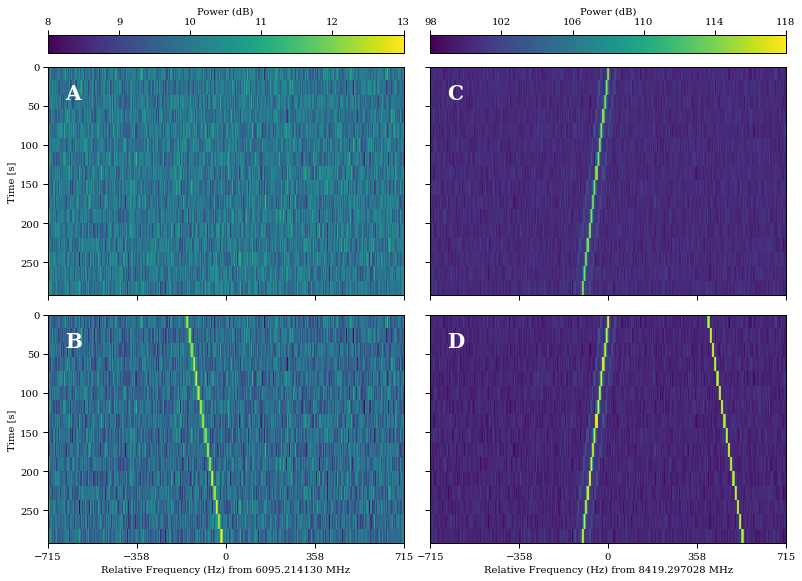

In [91]:
from astropy import units as u
import setigen as stg


plt.rc('font', family='serif')
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 1

fig, axs = plt.subplots(2, 2,
                        figsize=(11, 8),
                        gridspec_kw={'height_ratios': [2.5,2]},
                        sharex=True,
                        sharey=True)
plt.tight_layout()

import matplotlib.transforms as mtransforms
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
import matplotlib.ticker as ticker
tick_spacing=2.7939677238464355*150/1e6


# Synthetic plots

frame = stg.Frame(fchans=512,
                  tchans=16,
                  df=2.7939677238464355*u.Hz,
                  dt=18.253611008*u.s,
                  fch1=6095.214842353016*u.MHz)
frame.add_noise(x_mean=10, noise_type='chi2')


plt.sca(axs[0, 0])
plt.imshow(frame.get_data(use_db=True), 
           extent=[frame.fs[0]-frame.fs[256], frame.fs[-1]+frame.df-frame.fs[256], frame.ts[-1]+frame.dt, frame.ts[0]],
           aspect='auto', 
           interpolation='none')
plt.ylabel('Time [s]')

cbar = plt.colorbar(ax=[axs[0, 0]], location='top')
cbar.set_label('Power (dB)')
plt.clim(8, 13)
cbar.ax.locator_params(nbins=5)

# rel_freq = frame.fmin-frame.fs[256]+np.arange(5)*128*frame.df
# # plt.xticks(ticks=np.arange(5)*128,
# #            labels=[f'{freq:0.1f}' for freq in rel_freq])
# plt.xticks(ticks=rel_freq,
#            labels=[f'{freq:0.1f}' for freq in rel_freq])
# plt.xlabel(f'Relative Frequency (Hz) from {frame.fs[256]/1e6:.6f} MHz')


frame.add_signal(
    stg.constant_path(
        f_start=frame.get_frequency(index=200),
        drift_rate=0.5*u.Hz/u.s
    ),
    stg.constant_t_profile(
        level=frame.get_intensity(snr=30)
    ),
    stg.gaussian_f_profile(width=10*u.Hz),
    stg.constant_bp_profile(level=1)
)

plt.sca(axs[1, 0])
plt.imshow(frame.get_data(use_db=True), 
           extent=[frame.fs[0]-frame.fs[256], frame.fs[-1]+frame.df-frame.fs[256], frame.ts[-1]+frame.dt, frame.ts[0]],
           aspect='auto', 
           interpolation='none')
plt.ylabel('Time [s]')


# cbar = plt.colorbar(ax=[axs[1, 0]], location='top')
# cbar.remove()
# cbar.set_label('Power (dB)')
# plt.clim(8, 13)
# cbar.ax.locator_params(nbins=5)

rel_freq = frame.fmin-frame.fs[256]+np.arange(5)*128*frame.df
# plt.xticks(ticks=np.arange(5)*128,
#            labels=[f'{freq:0.1f}' for freq in rel_freq])
plt.xticks(ticks=rel_freq,)
#            labels=[f'{freq}' for freq in rel_freq])
plt.xlabel(f'Relative Frequency (Hz) from {frame.fs[256]/1e6:.6f} MHz')



# Voyager plots


# Adjusted freqency so that Voyager starts exactly in the middle (index 256)
df = 2.7939677238464355
fr = stg.Frame(bl.Waterfall('/datax/scratch/bbrzycki/Voyager1.single_coarse.fine_res.h5',
               f_start=8419.2+(34500-6-23)*df/1e6,
               f_stop=8419.2+(35012-6-23)*df/1e6))

plt.sca(axs[0, 1])
plt.imshow(fr.get_data(use_db=True), 
           extent=[fr.fs[0]-fr.fs[256], fr.fs[-1]+fr.df-fr.fs[256], fr.ts[-1]+fr.dt, fr.ts[0]],
           aspect='auto', 
           interpolation='none')

cbar = plt.colorbar(ax=[axs[0, 1]], location='top')
cbar.set_label('Power (dB)')
plt.clim(98, 118)
cbar.set_ticks(98+np.arange(6)*4)

# rel_freq = fr.fmin-fr.fs[256]+np.arange(5)*128*fr.df
# # plt.xticks(ticks=np.arange(5)*128,
# #            labels=[f'{freq:0.1f}' for freq in rel_freq])
# plt.xticks(ticks=rel_freq,
#            labels=[f'{freq:0.1f}' for freq in rel_freq])
# plt.xlabel(f'Relative Frequency (Hz) from {fr.fs[256]/1e6:.6f} MHz')

fr.add_signal(
    stg.constant_path(
        f_start=fr.get_frequency(index=400),
        drift_rate=0.5*u.Hz/u.s
    ),
    stg.constant_t_profile(
        level=fr.get_intensity(snr=1000)
    ),
    stg.gaussian_f_profile(width=2*fr.df),
    stg.constant_bp_profile(level=1)
)

plt.sca(axs[1, 1])
plt.imshow(fr.get_data(use_db=True), 
           extent=[fr.fs[0]-fr.fs[256], fr.fs[-1]+fr.df-fr.fs[256], fr.ts[-1]+fr.dt, fr.ts[0]],
           aspect='auto', 
           interpolation='none')

# cbar = plt.colorbar(ax=[axs[1, 1]], location='top')
# cbar.remove()
# cbar.set_label('Power (dB)')
# plt.clim(98, 118)
# cbar.set_ticks(98+np.arange(6)*4)

rel_freq = fr.fmin-fr.fs[256]+np.arange(5)*128*fr.df
# plt.xticks(ticks=np.arange(5)*128,
#            labels=[f'{freq:0.1f}' for freq in rel_freq])
plt.xticks(ticks=rel_freq,)
#            labels=[f'{freq}' for freq in rel_freq])
plt.xlabel(f'Relative Frequency (Hz) from {fr.fs[256]/1e6:.6f} MHz')



axs[0,0].text(0.02, 0.952, 
              'A',
              transform=axs[0,0].transAxes + trans,
              verticalalignment='top',
              fontsize=20,
              fontweight='bold',
              color='white')

axs[1,0].text(0.02, 0.952, 
              'B',
              transform=axs[1,0].transAxes + trans,
              verticalalignment='top',
              fontsize=20,
              fontweight='bold',
              color='white')

axs[0,1].text(0.02, 0.952, 
              'C',
              transform=axs[0,1].transAxes + trans,
              verticalalignment='top',
              fontsize=20,
              fontweight='bold',
              color='white')

axs[1,1].text(0.02, 0.952, 
              'D',
              transform=axs[1,1].transAxes + trans,
              verticalalignment='top',
              fontsize=20,
              fontweight='bold',
              color='white')




# plt.subplots_adjust(wspace=0.15)

plt.savefig('spectrogram_multiplot_compact.pdf', bbox_inches='tight')
plt.show()




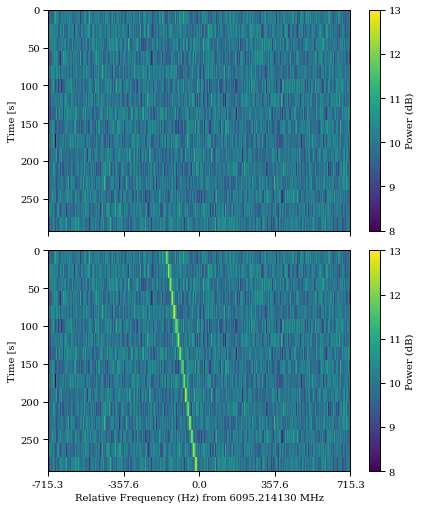

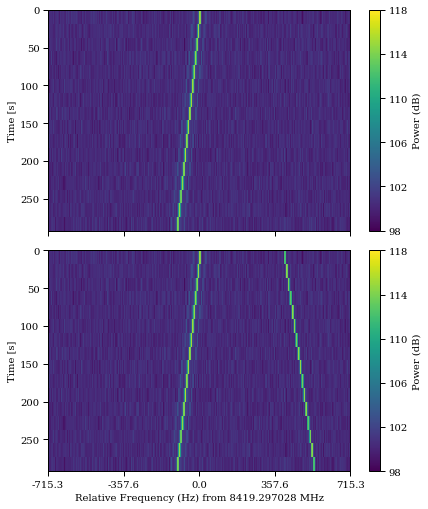

In [96]:
from astropy import units as u
import setigen as stg


plt.rc('font', family='serif')
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['axes.linewidth'] = 1

fig, axs = plt.subplots(2, 1, figsize=(6, 7), sharex='col')
plt.tight_layout()

import matplotlib.transforms as mtransforms
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
import matplotlib.ticker as ticker
tick_spacing=2.7939677238464355*150/1e6


# Synthetic plots

frame = stg.Frame(fchans=512,
                  tchans=16,
                  df=2.7939677238464355*u.Hz,
                  dt=18.253611008*u.s,
                  fch1=6095.214842353016*u.MHz)
frame.add_noise(x_mean=10, noise_type='chi2')


plt.sca(axs[0])
plt.imshow(frame.get_data(use_db=True), 
           extent=[frame.fs[0]-frame.fs[256], frame.fs[-1]+frame.df-frame.fs[256], frame.ts[-1]+frame.dt, frame.ts[0]],
           aspect='auto', 
           interpolation='none')
plt.ylabel('Time [s]')

cbar = plt.colorbar()
cbar.set_label('Power (dB)')
plt.clim(8, 13)
cbar.ax.locator_params(nbins=5)

# rel_freq = frame.fmin-frame.fs[256]+np.arange(5)*128*frame.df
# # plt.xticks(ticks=np.arange(5)*128,
# #            labels=[f'{freq:0.1f}' for freq in rel_freq])
# plt.xticks(ticks=rel_freq,
#            labels=[f'{freq:0.1f}' for freq in rel_freq])
# plt.xlabel(f'Relative Frequency (Hz) from {frame.fs[256]/1e6:.6f} MHz')


frame.add_signal(
    stg.constant_path(
        f_start=frame.get_frequency(index=200),
        drift_rate=0.5*u.Hz/u.s
    ),
    stg.constant_t_profile(
        level=frame.get_intensity(snr=30)
    ),
    stg.gaussian_f_profile(width=10*u.Hz),
    stg.constant_bp_profile(level=1)
)

plt.sca(axs[1])
plt.imshow(frame.get_data(use_db=True), 
           extent=[frame.fs[0]-frame.fs[256], frame.fs[-1]+frame.df-frame.fs[256], frame.ts[-1]+frame.dt, frame.ts[0]],
           aspect='auto', 
           interpolation='none')
plt.ylabel('Time [s]')

cbar = plt.colorbar()
cbar.set_label('Power (dB)')
plt.clim(8, 13)
cbar.ax.locator_params(nbins=5)

rel_freq = frame.fmin-frame.fs[256]+np.arange(5)*128*frame.df
# plt.xticks(ticks=np.arange(5)*128,
#            labels=[f'{freq:0.1f}' for freq in rel_freq])
plt.xticks(ticks=rel_freq,
           labels=[f'{freq:0.1f}' for freq in rel_freq])
plt.xlabel(f'Relative Frequency (Hz) from {frame.fs[256]/1e6:.6f} MHz')




plt.savefig('spectrogram_multiplot_a.pdf', bbox_inches='tight')
plt.show()




# Voyager plots
fig, axs = plt.subplots(2, 1, figsize=(6, 7), sharex='col')
plt.tight_layout()

# Adjusted freqency so that Voyager starts exactly in the middle (index 256)
df = 2.7939677238464355
fr = stg.Frame(bl.Waterfall('/datax/scratch/bbrzycki/Voyager1.single_coarse.fine_res.h5',
               f_start=8419.2+(34500-6-23)*df/1e6,
               f_stop=8419.2+(35012-6-23)*df/1e6))

plt.sca(axs[0])
plt.imshow(fr.get_data(use_db=True), 
           extent=[fr.fs[0]-fr.fs[256], fr.fs[-1]+fr.df-fr.fs[256], fr.ts[-1]+fr.dt, fr.ts[0]],
           aspect='auto', 
           interpolation='none')
plt.ylabel('Time [s]')

cbar = plt.colorbar()
cbar.set_label('Power (dB)')
plt.clim(98, 118)
cbar.set_ticks(98+np.arange(6)*4)

# rel_freq = fr.fmin-fr.fs[256]+np.arange(5)*128*fr.df
# # plt.xticks(ticks=np.arange(5)*128,
# #            labels=[f'{freq:0.1f}' for freq in rel_freq])
# plt.xticks(ticks=rel_freq,
#            labels=[f'{freq:0.1f}' for freq in rel_freq])
# plt.xlabel(f'Relative Frequency (Hz) from {fr.fs[256]/1e6:.6f} MHz')

fr.add_signal(
    stg.constant_path(
        f_start=fr.get_frequency(index=400),
        drift_rate=0.5*u.Hz/u.s
    ),
    stg.constant_t_profile(
        level=fr.get_intensity(snr=1000)
    ),
    stg.gaussian_f_profile(width=2*fr.df),
    stg.constant_bp_profile(level=1)
)

plt.sca(axs[1])
plt.imshow(fr.get_data(use_db=True), 
           extent=[fr.fs[0]-fr.fs[256], fr.fs[-1]+fr.df-fr.fs[256], fr.ts[-1]+fr.dt, fr.ts[0]],
           aspect='auto', 
           interpolation='none')
plt.ylabel('Time [s]')

cbar = plt.colorbar()
cbar.set_label('Power (dB)')
plt.clim(98, 118)
cbar.set_ticks(98+np.arange(6)*4)

rel_freq = fr.fmin-fr.fs[256]+np.arange(5)*128*fr.df
# plt.xticks(ticks=np.arange(5)*128,
#            labels=[f'{freq:0.1f}' for freq in rel_freq])
plt.xticks(ticks=rel_freq,
           labels=[f'{freq:0.1f}' for freq in rel_freq])
plt.xlabel(f'Relative Frequency (Hz) from {fr.fs[256]/1e6:.6f} MHz')


plt.savefig('spectrogram_multiplot_b.pdf', bbox_inches='tight')
plt.show()


